In [21]:
import numpy as np
import cv2
import base64
import matplotlib.pyplot as plt

In [22]:
image = cv2.imread("D:/code/yolov5-v6.1-infer/images/bus.jpg")
image.shape

(1080, 810, 3)

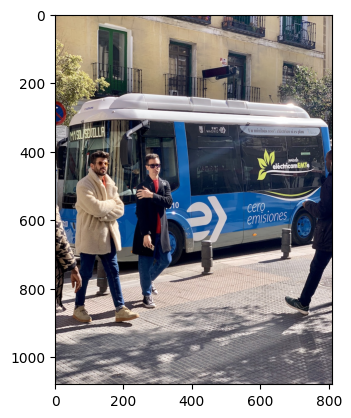

In [23]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 编码 cv2 -> [numpy] -> base64

In [24]:
cv2.imencode('.jpg', image)

(True, array([255, 216, 255, ..., 207, 255, 217], dtype=uint8))

In [26]:
image_encode = cv2.imencode('.jpg', image)[1]
image_encode[:5], image_encode.shape

(array([255, 216, 255, 224,   0], dtype=uint8), (477571,))

In [27]:
# 直接将imencode的结果进行base64编码
image_64 = base64.b64encode(image_encode)
image_64[:10]

b'/9j/4AAQSk'

In [28]:
# 直接将imencode的结果先tobytes()再进行base64编码
image_bytes = image_encode.tobytes()
image_64_ = base64.b64encode(image_bytes)
image_64_[:10]

b'/9j/4AAQSk'

In [29]:
# 两种方式的结果相同
image_64 == image_64_

True

# 解码 base64 -> numpy -> cv2

In [30]:
# 解码图片
image_decode = base64.b64decode(image_64)
image_decode[:10]

b'\xff\xd8\xff\xe0\x00\x10JFIF'

In [33]:
# 变成一个矩阵 单维向量
array = np.frombuffer(image_decode, dtype=np.uint8)
array[:5], array.shape

(array([255, 216, 255, 224,   0], dtype=uint8), (477571,))

In [34]:
# 再解码成图片 三维图片
image_res = cv2.imdecode(array, cv2.IMREAD_COLOR)
image_res.shape

(1080, 810, 3)

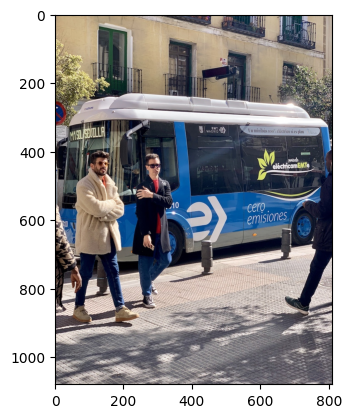

In [35]:
plt.imshow(cv2.cvtColor(image_res, cv2.COLOR_BGR2RGB))